# **Fouille de données**


## Importation librairies

In [ ]:
# Importer les librairies nécessaires 
import matplotlib.pyplot as plt # visualiser des données sous formes de graphiques
import numpy as np # manipuler des matrices ou tableaux 
import pandas as pd # analyse, nettoyage et préparation des données
import seaborn as sns # création de tracés statistiques communs
#scikit-learn
import sklearn


## Loading dataset

In [ ]:

#data = pd.read_csv('bank-full.csv', sep=';') // Premier dataset avec 45.000 observations
data = pd.read_csv('/content/drive/My Drive/Bank_Marketing_FD/bank.csv')
data.rename(columns={'deposit': 'y'}, inplace=True)

In [ ]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


## Analyse exploratoire des données

In [ ]:
data

In [ ]:
# Taille dataset
data.shape
# liste des colonnes
data.columns
# 5 premieres lignes
data.head()
# 5 dernieres lignes
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


### Detection de donnees manquantes


```
# '''
ou data.isnull().values.any() #return true ou false
'''
```



In [ ]:
data.isnull().sum() # ou isna()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

###vérification des lignes en double


In [ ]:
print('nombre de lignes dupliquées : {a}'.format(a=data.duplicated().sum()))

###Types de variables triées


In [ ]:
data.dtypes.sort_values()

###Les variables categorielles

In [ ]:
for col in data.select_dtypes(include='object').columns:
    print(col)
    print(data[col].unique())

##Indicateurs statistiques

```
Include: Liste des types de données à inclure lors de la description de la trame de données.
exclure: liste des types de données à exclure lors de la description de la trame de données.
```


In [ ]:
data.describe(percentiles=None, include=None, exclude=None)

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


##Description unidimensionnelle

###Variables quantitatives

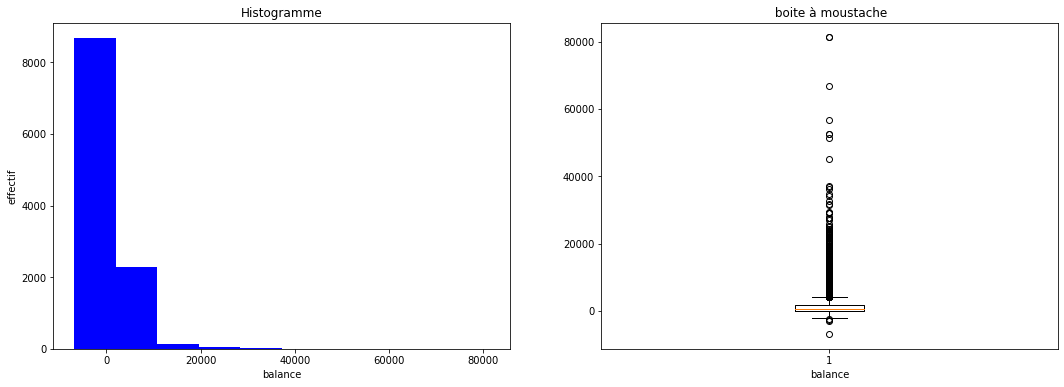

In [ ]:
# Histogramme et diagramme de boite
# subplot(121) nbre de lignes, nbre de colonnes, numéro de la figure
nouvelle_figure = plt.figure(figsize=(18,6))
axe1 = plt.subplot(121)
axe2 = plt.subplot(122)
axe1.hist(data['balance'], color='blue') #,bins=10
axe2.boxplot(data["balance"])

axe1.set_title('Histogramme')
axe2.set_title(' boite à moustache')
axe1.set_xlabel('balance')
axe1.set_ylabel('effectif')
axe2.set_xlabel('balance')
plt.grid(False)
# Enregistrer l'image
#plt.savefig('balance')
plt.show()

##Variables qualitatives


```
job, month, marital, education, default, housing, loan, contact, poutcome
```



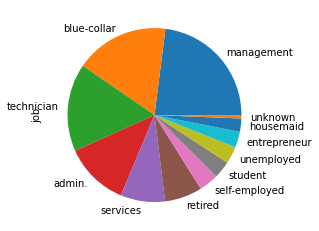

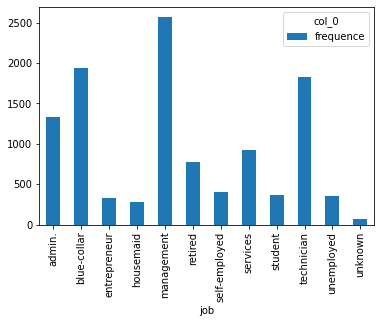

In [ ]:
#Diagramme en cercle
data["job"].value_counts(normalize=True).plot(kind='pie', legend=False)
#plt.savefig('poutcome1')

# Diagramme en bar
pd.crosstab(data.job, "frequence").plot.bar()
#plt.savefig('poutcome2')

## barplot de tous les variables categorielles

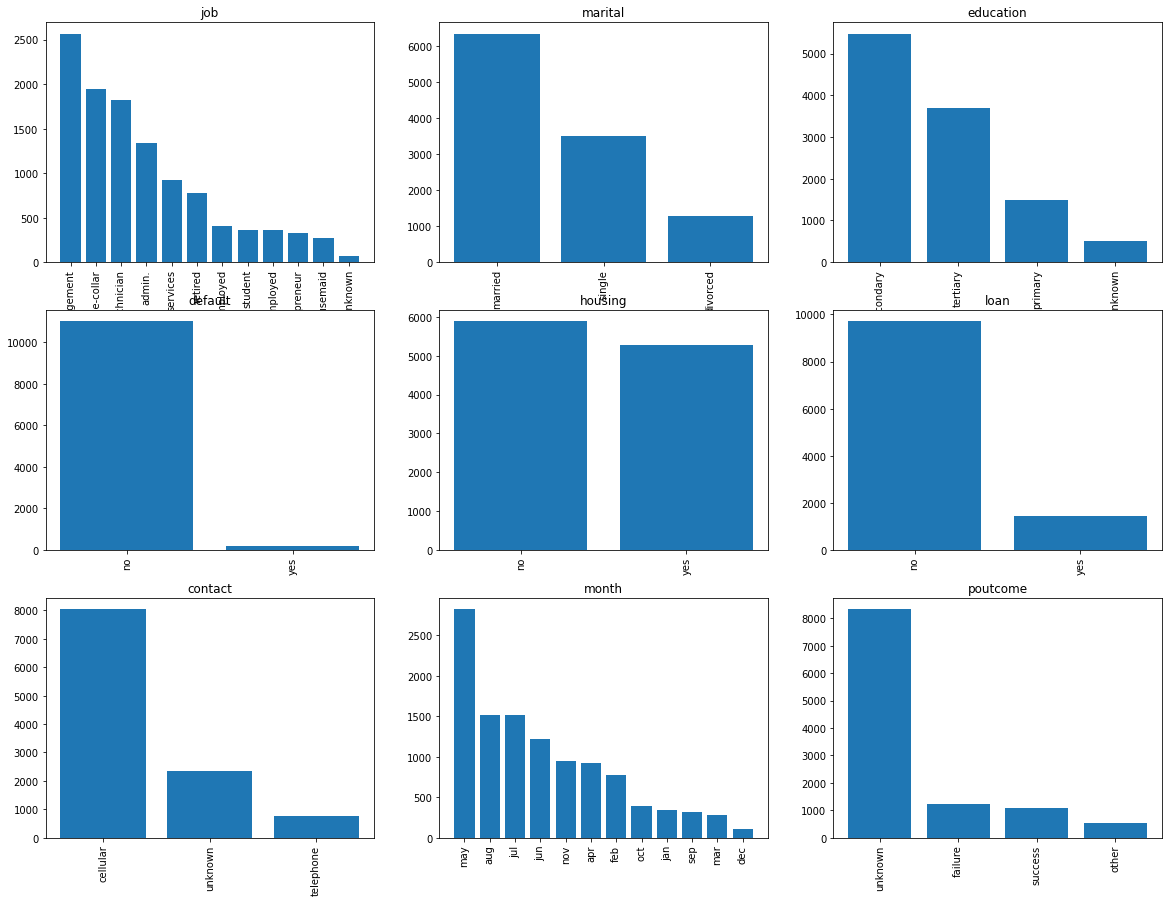

In [ ]:

# Variables qualitatives
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = data[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1
plt.savefig('testy')
plt.show()


##Variable dependante

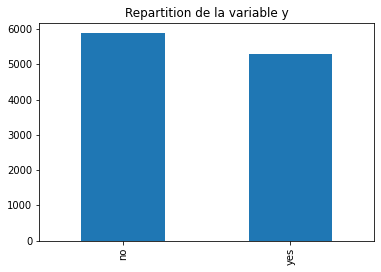

In [ ]:
#Analyse de la colonne des réponses
value_counts = data['y'].value_counts()

value_counts.plot.bar(title = 'Repartition de la variable y')
#plt.savefig('y')

###Variation de y en fonction des autres colonnes

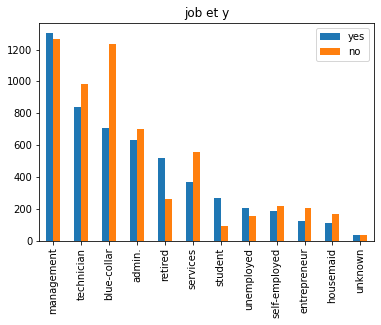

In [ ]:
#job and y
j_data = pd.DataFrame()

j_data['yes'] = data[data['y'] == 'yes']['job'].value_counts()
j_data['no'] = data[data['y'] == 'no']['job'].value_counts()

j_data.plot.bar(title = 'job et y')
plt.savefig('job_y')

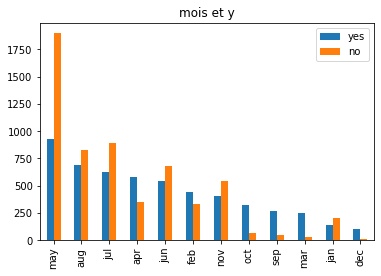

In [ ]:
#month and deposit
j_data = pd.DataFrame()

j_data['yes'] = data[data['y'] == 'yes']['month'].value_counts()
j_data['no'] = data[data['y'] == 'no']['month'].value_counts()

j_data.plot.bar(title = 'mois et y')
#plt.savefig('mois1_y')

In [ ]:
#marital status and deposit
j_data = pd.DataFrame()

j_data['yes'] = data[data['y'] == 'yes']['marital'].value_counts()
j_data['no'] = data[data['y'] == 'no']['marital'].value_counts()

j_data.plot.bar(title = 'Marital status et y')
#plt.savefig('marital_y')

In [ ]:
#education and deposit
j_data = pd.DataFrame()

j_data['yes'] = data[data['y'] == 'yes']['education'].value_counts()
j_data['no'] = data[data['y'] == 'no']['education'].value_counts()

j_data.plot.bar(title = 'Education et y')
#plt.savefig('education_y')

In [ ]:
#type of contact and deposit
j_data = pd.DataFrame()

j_data['yes'] = data[data['y'] == 'yes']['contact'].value_counts()
j_data['no'] = data[data['y'] == 'no']['contact'].value_counts()

j_data.plot.bar(title = 'Type de contact et y')
#plt.savefig('contact_y')

In [ ]:
#age and y
a_data = pd.DataFrame()
a_data['age_yes'] = (data[data['y'] == 'yes'][['y','age']].describe())['age']
a_data['age_no'] = (data[data['y'] == 'no'][['y','age']].describe())['age']
a_data

In [ ]:
a_data.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Age et y')
#plt.savefig('age_y')

In [ ]:
# Balance et y
a_data = pd.DataFrame()
a_data['balance_yes'] = (data[data['y'] == 'yes'][['y','balance']].describe())['balance']
a_data['balance_no'] = (data[data['y'] == 'no'][['y','balance']].describe())['balance']
a_data

#Analyse bidirectionnelle

###Correlation entre les variables

In [ ]:
data.corr(method='pearson')

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.112300,-0.000762,0.000189,-0.005278,0.002774,0.020169
balance,0.112300,1.000000,0.010467,0.022436,-0.013894,0.017411,0.030805
day,-0.000762,0.010467,1.000000,-0.018511,0.137007,-0.077232,-0.058981
duration,0.000189,0.022436,-0.018511,1.000000,-0.041557,-0.027392,-0.026716
campaign,-0.005278,-0.013894,0.137007,-0.041557,1.000000,-0.102726,-0.049699
pdays,0.002774,0.017411,-0.077232,-0.027392,-0.102726,1.000000,0.507272
previous,0.020169,0.030805,-0.058981,-0.026716,-0.049699,0.507272,1.000000


### Matrice de correlation seaborn

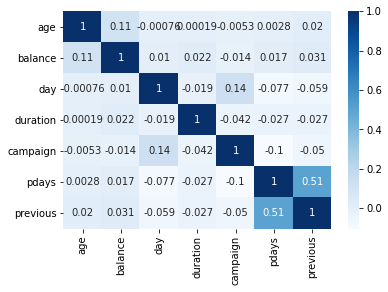

In [ ]:
sns.heatmap(data.corr(method='pearson'), annot=True, cmap='Blues')

### Correlation paire de points

In [ ]:
sns.heatmap(data.corr(method='pearson'), annot=True, cmap='Blues')
sns_plot = sns.pairplot(data, palette="husl")
#plt.savefig('pair_point')

##Analyse des composants principales

```
Centrer et réduire les variables pour réaliser une ACP normée  avec la classe StandardScaler de sklearn
```



In [ ]:
from sklearn.decomposition import PCA # ACP
from sklearn.preprocessing import StandardScaler #classe pour standardisation

In [ ]:
# PCA pourcentage de perte
data_acp = data[["age","balance","day","duration","campaign","previous"]]#,"pdays"
component_var = {}
for i in range(2, 7):
    pca = PCA(n_components=i)
    res = pca.fit(data_acp)
#     print('At components: ', i)
#     display(pca.explained_variance_ratio_, sum(pca.explained_variance_ratio_))
    component_var[i] = sum(pca.explained_variance_ratio_)
print(component_var)

{2: 0.9999787482399258, 3: 0.9999920644444728, 4: 0.9999988156515794, 5: 0.9999995068500517, 6: 0.9999999999999999}


In [ ]:
# les variables quantitatifs
data_acp = data[["age","balance","day","duration","campaign","pdays","previous"]]

# Instanciation pour la standardisation 
sc = StandardScaler()

# Normalisation: centrage-réduction
data_acp_standardise = sc.fit_transform(data_acp)

Text(0, 0.5, 'Variance cumulative expliquée')

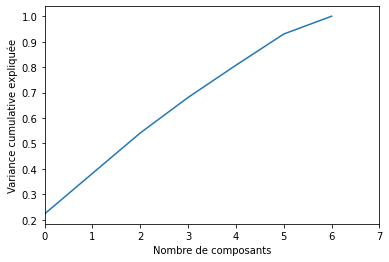

In [ ]:
pca = PCA().fit(data_acp_standardise)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,7,1)
plt.xlabel('Nombre de composants')
plt.ylabel('Variance cumulative expliquée')
#plt.savefig('acp')

## Apprentissage supervisé

In [ ]:
import matplotlib.pyplot as plt # visualiser des données sous formes de graphiques
import numpy as np # manipuler des matrices ou tableaux 
import pandas as pd # analyse, nettoyage et préparation des données
import seaborn as sns # création de tracés statistiques communs

import sklearn

##Data preprocessing

In [ ]:
# Independent variables
X = data.iloc[:, :-1].values

In [ ]:
# Dependent variables
y = data.iloc[:, -1].values

### Encoding of Variables

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from  sklearn.compose import ColumnTransformer

In [ ]:
# Independent variables
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

#### Dependent Variables

In [ ]:
# Variables dependantes a coder en 0 et 1

# Variable default
labelencoder_X_default = LabelEncoder()
X[:, 4] = labelencoder_X_default.fit_transform(X[:, 4])

# Variable housing
labelencoder_X_housing = LabelEncoder()
X[:, 6] = labelencoder_X_housing.fit_transform(X[:, 6])

# Variable loan
labelencoder_X_loan = LabelEncoder()
X[:, 7] = labelencoder_X_loan.fit_transform(X[:, 7])

# Variables a coder en plusieurs
# Utilisation OneHotEncoder() et columnTransform
labelencoder_X_job = LabelEncoder()
X[:, 1] = labelencoder_X_job.fit_transform(X[:, 1])

# Utilisation OneHotEncoder() et columnTransform
labelencoder_X_marital = LabelEncoder()
X[:, 2] = labelencoder_X_marital.fit_transform(X[:, 2])

labelencoder_X_education = LabelEncoder()
X[:, 3] = labelencoder_X_education.fit_transform(X[:, 3])

labelencoder_X_contact = LabelEncoder()
X[:, 8] = labelencoder_X_education.fit_transform(X[:, 8])

labelencoder_X_month = LabelEncoder()
X[:, 10] = labelencoder_X_education.fit_transform(X[:, 10])

labelencoder_X_poutcome = LabelEncoder()
X[:, 15] = labelencoder_X_education.fit_transform(X[:, 15])

#t = X.select_dtypes(exclude=['int64'])

## One_hot encoder for all variable encoding 0, 1, 2, 3, 4

In [ ]:
columtransform =  ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(), [1, 2, 3, 8, 10, 15])],    # The column numbers to be transformed (here is [0] but can be [0, 1, 3])
    remainder='passthrough'                         # Leave the rest of the columns untouched
)

X = np.array(columtransform.fit_transform(X), dtype=np.float)

In [ ]:
# Conversion en DataFrame et calcul de la correlation
df = pd.DataFrame(data=X)
df.corr(method='pearson')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47
0,1.000000,-0.169190,-0.064104,-0.058445,-0.201292,-0.100845,-0.071487,-0.110616,-0.067258,-0.162775,-0.066968,-0.029268,0.023706,-0.045744,0.032431,-0.111154,0.237306,-0.160216,-0.025973,0.006695,-0.009244,-0.001611,0.006708,-0.060845,-0.000409,0.003538,0.001418,0.013759,0.005268,0.007140,0.025091,-0.010626,0.004728,0.009739,0.033750,0.007513,0.005628,-0.031759,-0.057458,-0.020592,-0.038001,0.060213,0.050383,-0.013901,-0.025542,-0.017881,0.044068,0.022699
1,-0.169190,1.000000,-0.079905,-0.072850,-0.250905,-0.125701,-0.089107,-0.137880,-0.083836,-0.202896,-0.083474,-0.036482,-0.056240,0.109188,-0.077645,0.299737,0.076687,-0.298548,-0.000640,-0.136661,-0.018414,0.162004,0.017367,-0.096834,-0.029075,-0.054938,-0.031317,0.002289,0.034933,-0.057910,0.170171,-0.029079,-0.054247,-0.047577,-0.018022,-0.002788,-0.077422,0.066703,-0.066567,0.022779,-0.046220,0.189848,0.057956,-0.023039,0.029986,0.005522,-0.030695,-0.039939
2,-0.064104,-0.079905,1.000000,-0.027602,-0.095065,-0.047627,-0.033762,-0.052241,-0.031764,-0.076875,-0.031627,-0.013822,0.006638,0.050746,-0.058665,-0.004788,-0.021132,0.026612,-0.001555,-0.020471,0.006799,0.018308,-0.015645,-0.028833,-0.011989,-0.003761,-0.012611,0.036424,0.022241,-0.020873,-0.017064,0.052053,-0.018787,-0.007558,-0.001840,-0.024244,-0.035072,0.036967,0.024176,0.022060,0.005039,0.011492,0.042631,-0.004463,-0.000908,0.013883,-0.029732,-0.022470
3,-0.058445,-0.072850,-0.027602,1.000000,-0.086673,-0.043422,-0.030781,-0.047629,-0.028960,-0.070088,-0.028835,-0.012602,0.025797,0.039865,-0.060264,0.181937,-0.065345,-0.058532,-0.008983,-0.016013,0.027349,0.000585,-0.013995,0.023153,-0.004104,-0.011493,0.005211,0.025084,0.042653,0.000838,-0.051037,-0.006554,0.007477,-0.006361,-0.016919,-0.011314,-0.008434,0.023429,0.082739,0.018431,-0.007987,-0.062196,-0.027197,0.013318,-0.010807,0.010570,-0.025950,-0.022766
4,-0.201292,-0.250905,-0.095065,-0.086673,1.000000,-0.149550,-0.106014,-0.164041,-0.099742,-0.241392,-0.099312,-0.043403,-0.006150,-0.013764,0.018908,-0.174071,-0.434808,0.602002,-0.031231,0.103077,-0.042690,-0.086916,-0.000917,0.088056,0.003691,0.011392,-0.017348,-0.019930,-0.029952,0.037776,-0.084341,0.031556,0.011433,0.035354,0.007280,0.017462,0.033104,-0.036213,-0.046492,0.000663,0.044912,-0.060146,-0.047762,0.008711,-0.016546,0.015988,0.015704,0.022079
5,-0.100845,-0.125701,-0.047627,-0.043422,-0.149550,1.000000,-0.053112,-0.082183,-0.049970,-0.120935,-0.049754,-0.021745,0.088912,0.098276,-0.166003,0.177890,-0.047633,-0.087604,0.021081,-0.033346,0.160725,-0.063484,0.003406,0.011415,0.054611,0.031694,0.028547,-0.022119,-0.011464,0.051571,-0.088080,-0.022427,0.073922,0.064963,-0.014159,-0.002350,0.072092,-0.037441,0.555863,-0.019388,0.075423,-0.172708,-0.048794,-0.004511,0.014194,-0.037943,0.004212,0.019384
6,-0.071487,-0.089107,-0.033762,-0.030781,-0.106014,-0.053112,1.000000,-0.058258,-0.035423,-0.085728,-0.035270,-0.015414,-0.011849,-0.008164,0.016864,-0.037121,-0.060080,0.097929,-0.016336,-0.005119,0.003614,0.003384,0.006106,0.005428,-0.004808,-0.000294,-0.004107,-0.004105,0.005618,-0.000044,-0.022554,0.032360,0.009830,-0.021780,-0.010039,0.005632,-0.001399,0.005394,-0.023163,0.007493,0.020264,-0.016903,0.004299,0.006458,0.013506,0.001776,-0.011224,-0.002338
7,-0.110616,-0.137880,-0.052241,-0.047629,-0.164041,-0.082183,-0.058258,1.000000,-0.054811,-0.132652,-0.054575,-0.023852,0.014311,-0.013907,0.004966,-0.039139,0.190772,-0.174299,-0.000154,-0.027547,-0.023053,0.044715,-0.015737,-0.066037,-0.003609,-0.023237,0.012336,0.038766,0.014534,-0.014292,0.071443,-0.018688,-0.034308,-0.024166,-0.002646,-0.012776,-0.029337,0.028030,-0.077879,-0.018413,-0.041646,0.084247,0.032097,0.002497,0.012077,0.007496,0.000595,-0.019366
8,-0.067258,-0.083836,-0.031764,-0.028960,-0.099742,-0.049970,-0.035423,-0.054811,1.000000,-0.080657,-0.033183,-0.014503,-0.062910,-0.194390,0.250543,-0

In [ ]:
import seaborn; seaborn.set()

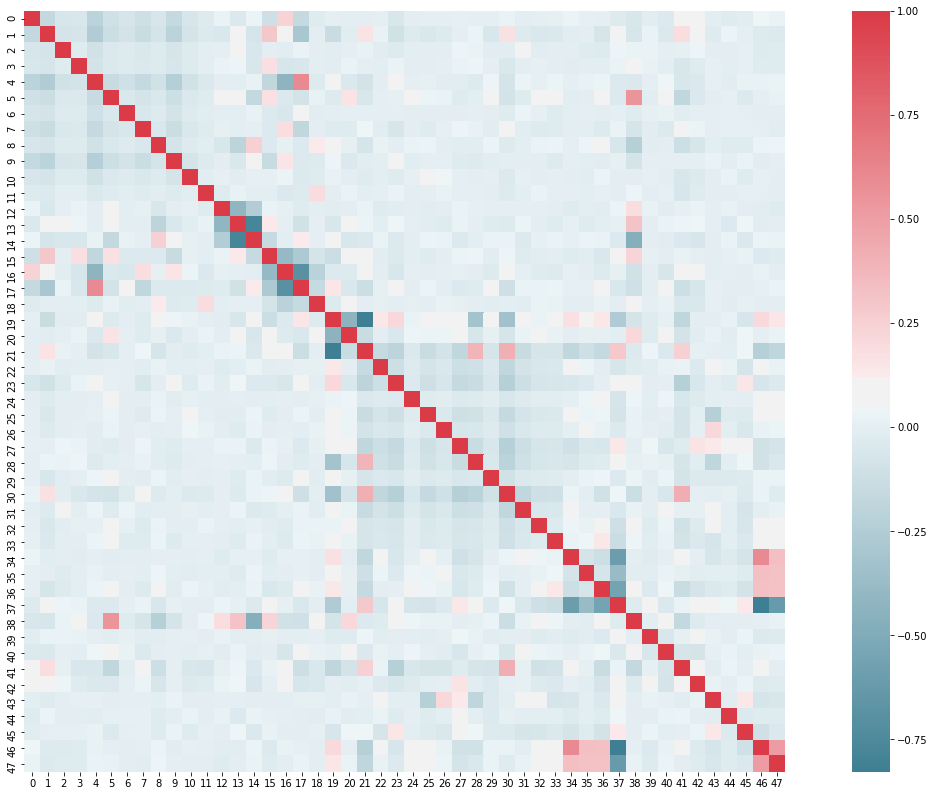

In [ ]:
# Matrice de corrélation 
f, ax = plt.subplots(figsize=(24, 14))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax)
plt.savefig('corr_2')

In [ ]:
from sklearn.model_selection import train_test_split
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Apprentissage supervisés

In [ ]:
import time

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
dict_classifiers = {
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=18),
    "Naive Bayes": GaussianNB()
}

In [ ]:
dict_classifiers

In [ ]:
no_classifiers = len(dict_classifiers.keys())

def batch_classify(X_train, y_train, verbose = True):
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,3)), columns = ['classifier', 'train_score', 'training_time'])
    count = 0
    for key, classifier in dict_classifiers.items():
        t_start = time.clock()
        classifier.fit(X_train, y_train)
        t_end = time.clock()
        t_diff = t_end - t_start
        train_score = classifier.score(X_train, y_train)
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
        df_results.loc[count,'training_time'] = t_diff
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key, f=t_diff))
        count+=1
    return df_results

##result

In [ ]:
df_results = batch_classify(X_train, y_train)
print(df_results.sort_values(by='train_score', ascending=False))

trained Nearest Neighbors in 0.08 s
trained Linear SVM in 5.21 s
trained Decision Tree in 0.09 s
trained Random Forest in 0.22 s
trained Naive Bayes in 0.01 s
          classifier  train_score  training_time
2      Decision Tree     1.000000       0.088355
3      Random Forest     0.998544       0.215917
1         Linear SVM     0.884646       5.214872
0  Nearest Neighbors     0.833800       0.075308
4        Naive Bayes     0.715646       0.009199


#Use Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# SVC
svc_clf = SVC()
svc_scores = cross_val_score(svc_clf, X_train, y_train, cv=3)
svc_mean = svc_scores.mean()

# KNearestNeighbors
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=3)
knn_mean = knn_scores.mean()

# Decision Tree
tree_clf = tree.DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, X_train, y_train, cv=3)
tree_mean = tree_scores.mean()

# Gradient Boosting Classifier
#grad_clf = GradientBoostingClassifier()
#grad_scores = cross_val_score(grad_clf, X_train, y_train, cv=3)
#grad_mean = grad_scores.mean()

# Random Forest Classifier
rand_clf = RandomForestClassifier(n_estimators=18)
rand_scores = cross_val_score(rand_clf, X_train, y_train, cv=3)
rand_mean = rand_scores.mean()

# NeuralNet Classifier
#neural_clf = MLPClassifier(alpha=1)
#neural_scores = cross_val_score(neural_clf, X_train, y_train, cv=3)
#neural_mean = neural_scores.mean()

# Naives Bayes
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, X_train, y_train, cv=3)
nav_mean = nav_scores.mean()

# Create a Dataframe with the results.
d = {'Classifiers': ['SVC', 'KNN', 'Dec Tree', 'Rand FC', 'Naives Bayes'], 
    'Crossval Mean Scores': [svc_mean, knn_mean, tree_mean, rand_mean, nav_mean]}
result_df = pd.DataFrame(data=d)

## Result cross-validation

In [ ]:
# Performance modele
result_df = result_df.sort_values(by=['Crossval Mean Scores'], ascending=False)
result_df

,Classifiers,Crossval Mean Scores
0,SVC,0.842088
3,Rand FC,0.837385
2,Dec Tree,0.781723
1,KNN,0.744541
4,Naives Bayes,0.712624


In [ ]:
# Cross validate precision prediction
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

In [ ]:
# SVM
y_train_pred_svm = cross_val_predict(svc_clf, X_train, y_train, cv=3)
svc_clf.fit(X_train, y_train)
print ("SVC Classifier accuracy is %2.2f" % accuracy_score(y_train, y_train_pred_svm))

SVC Classifier accuracy is 0.84


In [ ]:
# Precision Random Forest
y_train_pred_random = cross_val_predict(rand_clf, X_train, y_train, cv=3)
rand_clf.fit(X_train, y_train)
print ("Random Forest accuracy is %2.2f" % accuracy_score(y_train, y_train_pred_random))

Random Forest accuracy is 0.84


# Matrice de confusion

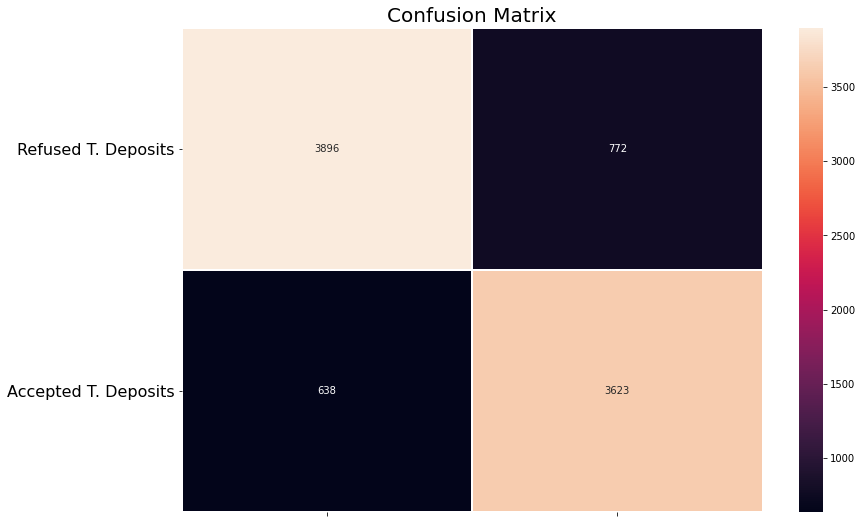

<Figure size 432x288 with 0 Axes>

In [ ]:
from sklearn.metrics import confusion_matrix
# 4697: no's, 4232: yes
conf_matrix = confusion_matrix(y_train, y_train_pred_svm)
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("")
ax.set_yticklabels(['Depot a terme refusé', 'Depot à terme accepté'], fontsize=16, rotation=360)
plt.savefig('matrice_confusion_svm')
plt.show()
plt.savefig('matrice_confusion_svm')

# Precision et rappel

In [ ]:
from sklearn.metrics import precision_score, recall_score
print('Precision Score: ', precision_score(y_train, y_train_pred_svm))
print('Recall Score: ', recall_score(y_train, y_train_pred_svm))

Precision Score:  0.8243458475540387
Recall Score:  0.8502698896972541


# F score

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_train, y_train_pred_svm)

0.8371072088724584

# Increasing the threshold decreases the recall.


In [ ]:
some_instance = X_train[1250]

In [ ]:
y_scores = svc_clf.decision_function([some_instance])
y_scores

array([-0.6467883])

In [ ]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [ ]:
y_scores = cross_val_predict(svc_clf, X_train, y_train, cv=3, method="decision_function")
random_y_scores = cross_val_predict(rand_clf, X_train, y_train, cv=3, method="predict_proba")

In [ ]:
# hack to work around issue #9589 introduced in Scikit-Learn 0.19.0
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]

if random_y_scores.ndim == 2:
    random_y_scores = random_y_scores[:, 1]

In [ ]:
y_scores.shape

(8929,)

In [ ]:
# How can we decide which threshold to use? We want to return the scores instead of predictions with this code.
from sklearn.metrics import precision_recall_curve

precisions, recalls, threshold = precision_recall_curve(y_train, y_scores)

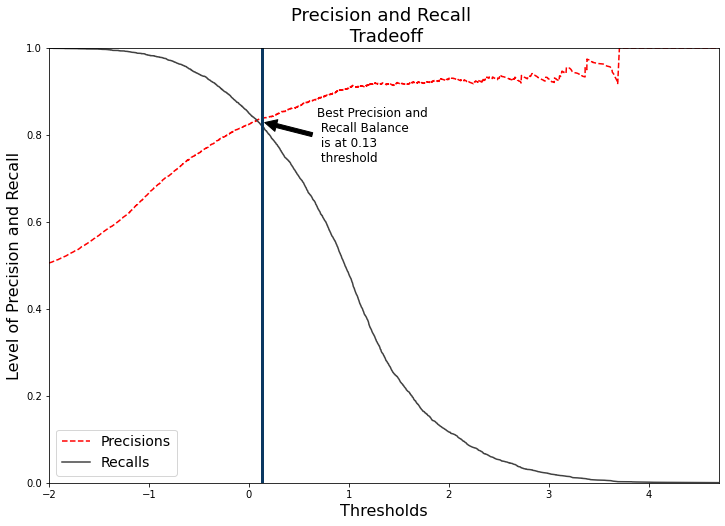

In [ ]:
def precision_recall_curve(precisions, recalls, thresholds):
    fig, ax = plt.subplots(figsize=(12,8))
    plt.plot(thresholds, precisions[:-1], "r--", label="Precisions")
    plt.plot(thresholds, recalls[:-1], "#424242", label="Recalls")
    plt.title("Precision and Recall \n Tradeoff", fontsize=18)
    plt.ylabel("Level of Precision and Recall", fontsize=16)
    plt.xlabel("Thresholds", fontsize=16)
    plt.legend(loc="best", fontsize=14)
    plt.xlim([-2, 4.7])
    plt.ylim([0, 1])
    plt.axvline(x=0.13, linewidth=3, color="#0B3861")
    plt.annotate('Best Precision and \n Recall Balance \n is at 0.13 \n threshold ', xy=(0.13, 0.83), xytext=(55, -40),
             textcoords="offset points",
            arrowprops=dict(facecolor='black', shrink=0.05),
                fontsize=12, 
                color='k')
    
precision_recall_curve(precisions, recalls, threshold)
plt.show()

# Courbe ROC

In [ ]:
from sklearn.metrics import roc_curve
# SVM Classifier
# Random Classifier
svm_fpr, svm_tpr, thresold = roc_curve(y_train, y_scores)
random_fpr, random_tpr, neu_threshold = roc_curve(y_train, random_y_scores)


In [ ]:
def graph_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.figure(figsize=(10,6))
    plt.title('ROC Curve \n SVM Classifier', fontsize=18)
    plt.plot(false_positive_rate, true_positive_rate, label=label)
    plt.plot([0, 1], [0, 1], '#0C8EE0')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('ROC Score of 91.73% \n (Not the best score)', xy=(0.25, 0.9), xytext=(0.4, 0.85),
            arrowprops=dict(facecolor='#F75118', shrink=0.05),
            )
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#F75118', shrink=0.05),
                )

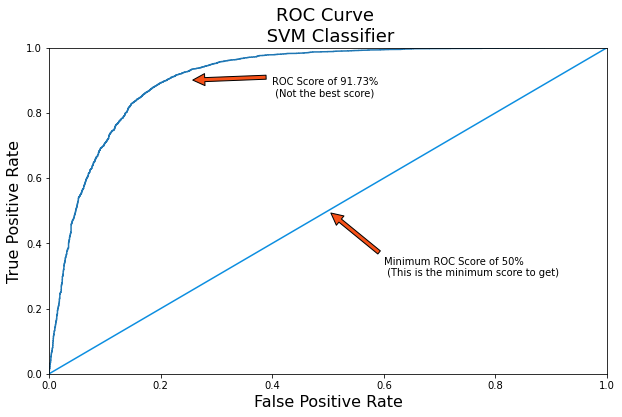

In [ ]:
graph_roc_curve(svm_fpr, grd_tpr, threshold)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

print('SVM Classifier Score: ', roc_auc_score(y_train, y_scores))
print('Random forest Classifier Score: ', roc_auc_score(y_train, random_y_scores))

SVM Classifier Score:  0.9133812037878873
Random forest Classifier Score:  0.9068511018510083


In [ ]:
def graph_roc_curve_multiple(svm_fpr, svm_tpr, random_fpr, random_tpr):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve \n Top 2 Classifiers', fontsize=18)
    plt.plot(svm_fpr, svm_tpr, label='SVM Classifier (Score = 91.13%)')
    plt.plot(random_fpr, random_tpr, label='random classifier (Score = 90%)')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    


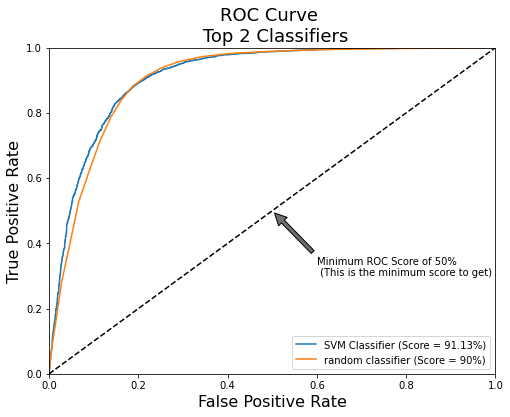

<Figure size 432x288 with 0 Axes>

In [ ]:
graph_roc_curve_multiple(svm_fpr, svm_tpr, random_fpr, random_tpr)
plt.savefig('top_classifier')
plt.show()
plt.savefig('top_classifier')

Feature ranking:
1. feature 11 (0.591310)
2. feature 8 (0.129966)
3. feature 6 (0.067020)
4. feature 13 (0.049923)
5. feature 15 (0.038138)
6. feature 14 (0.037830)
7. feature 10 (0.026646)
8. feature 5 (0.025842)
9. feature 0 (0.017757)
10. feature 12 (0.007889)
11. feature 3 (0.005280)
12. feature 9 (0.002200)
13. feature 2 (0.000147)
14. feature 1 (0.000050)
15. feature 7 (0.000000)
16. feature 4 (0.000000)


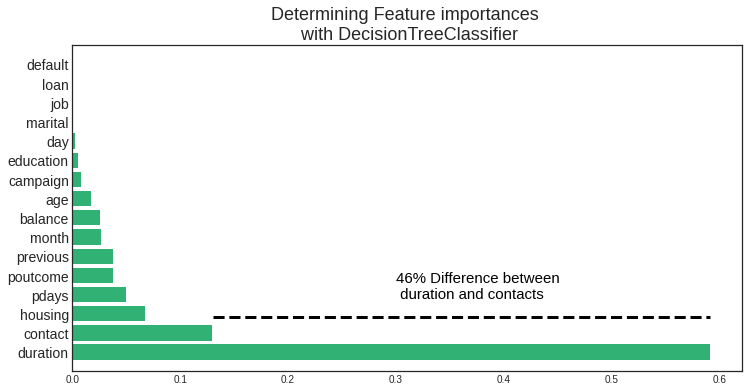

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
plt.style.use('seaborn-white')

term_deposits = data.copy()
# Convert the columns into categorical variables
term_deposits['job'] = term_deposits['job'].astype('category').cat.codes
term_deposits['marital'] = term_deposits['marital'].astype('category').cat.codes
term_deposits['education'] = term_deposits['education'].astype('category').cat.codes
term_deposits['contact'] = term_deposits['contact'].astype('category').cat.codes
term_deposits['poutcome'] = term_deposits['poutcome'].astype('category').cat.codes
term_deposits['month'] = term_deposits['month'].astype('category').cat.codes
term_deposits['default'] = term_deposits['default'].astype('category').cat.codes
term_deposits['loan'] = term_deposits['loan'].astype('category').cat.codes
term_deposits['housing'] = term_deposits['housing'].astype('category').cat.codes

# Let's create new splittings like before but now we modified the data so we need to do it one more time.
# Create train and test splits
target_name = 'y'
X = term_deposits.drop('y', axis=1)


label=term_deposits[target_name]

X_train, X_test, y_train, y_test = train_test_split(X,label,test_size=0.2, random_state=42, stratify=label)

# Build a classification task using 3 informative features
tree = tree.DecisionTreeClassifier(
    class_weight='balanced',
    min_weight_fraction_leaf = 0.01
    
)


tree = tree.fit(X_train, y_train)
importances = tree.feature_importances_
feature_names = term_deposits.drop('y', axis=1).columns
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
def feature_importance_graph(indices, importances, feature_names):
    plt.figure(figsize=(12,6))
    plt.title("Determining Feature importances \n with DecisionTreeClassifier", fontsize=18)
    plt.barh(range(len(indices)), importances[indices], color='#31B173',  align="center")
    plt.yticks(range(len(indices)), feature_names[indices], rotation='horizontal',fontsize=14)
    plt.ylim([-1, len(indices)])
    plt.axhline(y=1.85, xmin=0.21, xmax=0.952, color='k', linewidth=3, linestyle='--')
    plt.text(0.30, 2.8, '46% Difference between \n duration and contacts', color='k', fontsize=15)
    
feature_importance_graph(indices, importances, feature_names)
plt.show()